# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier





# Get The Data

In [2]:
data = pd.read_csv("/content/heart_disease_data.csv")

# Let's Look At The Data

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


All the columns are numeric value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


we have 302 records and 14 columns

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.corr()["target"]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

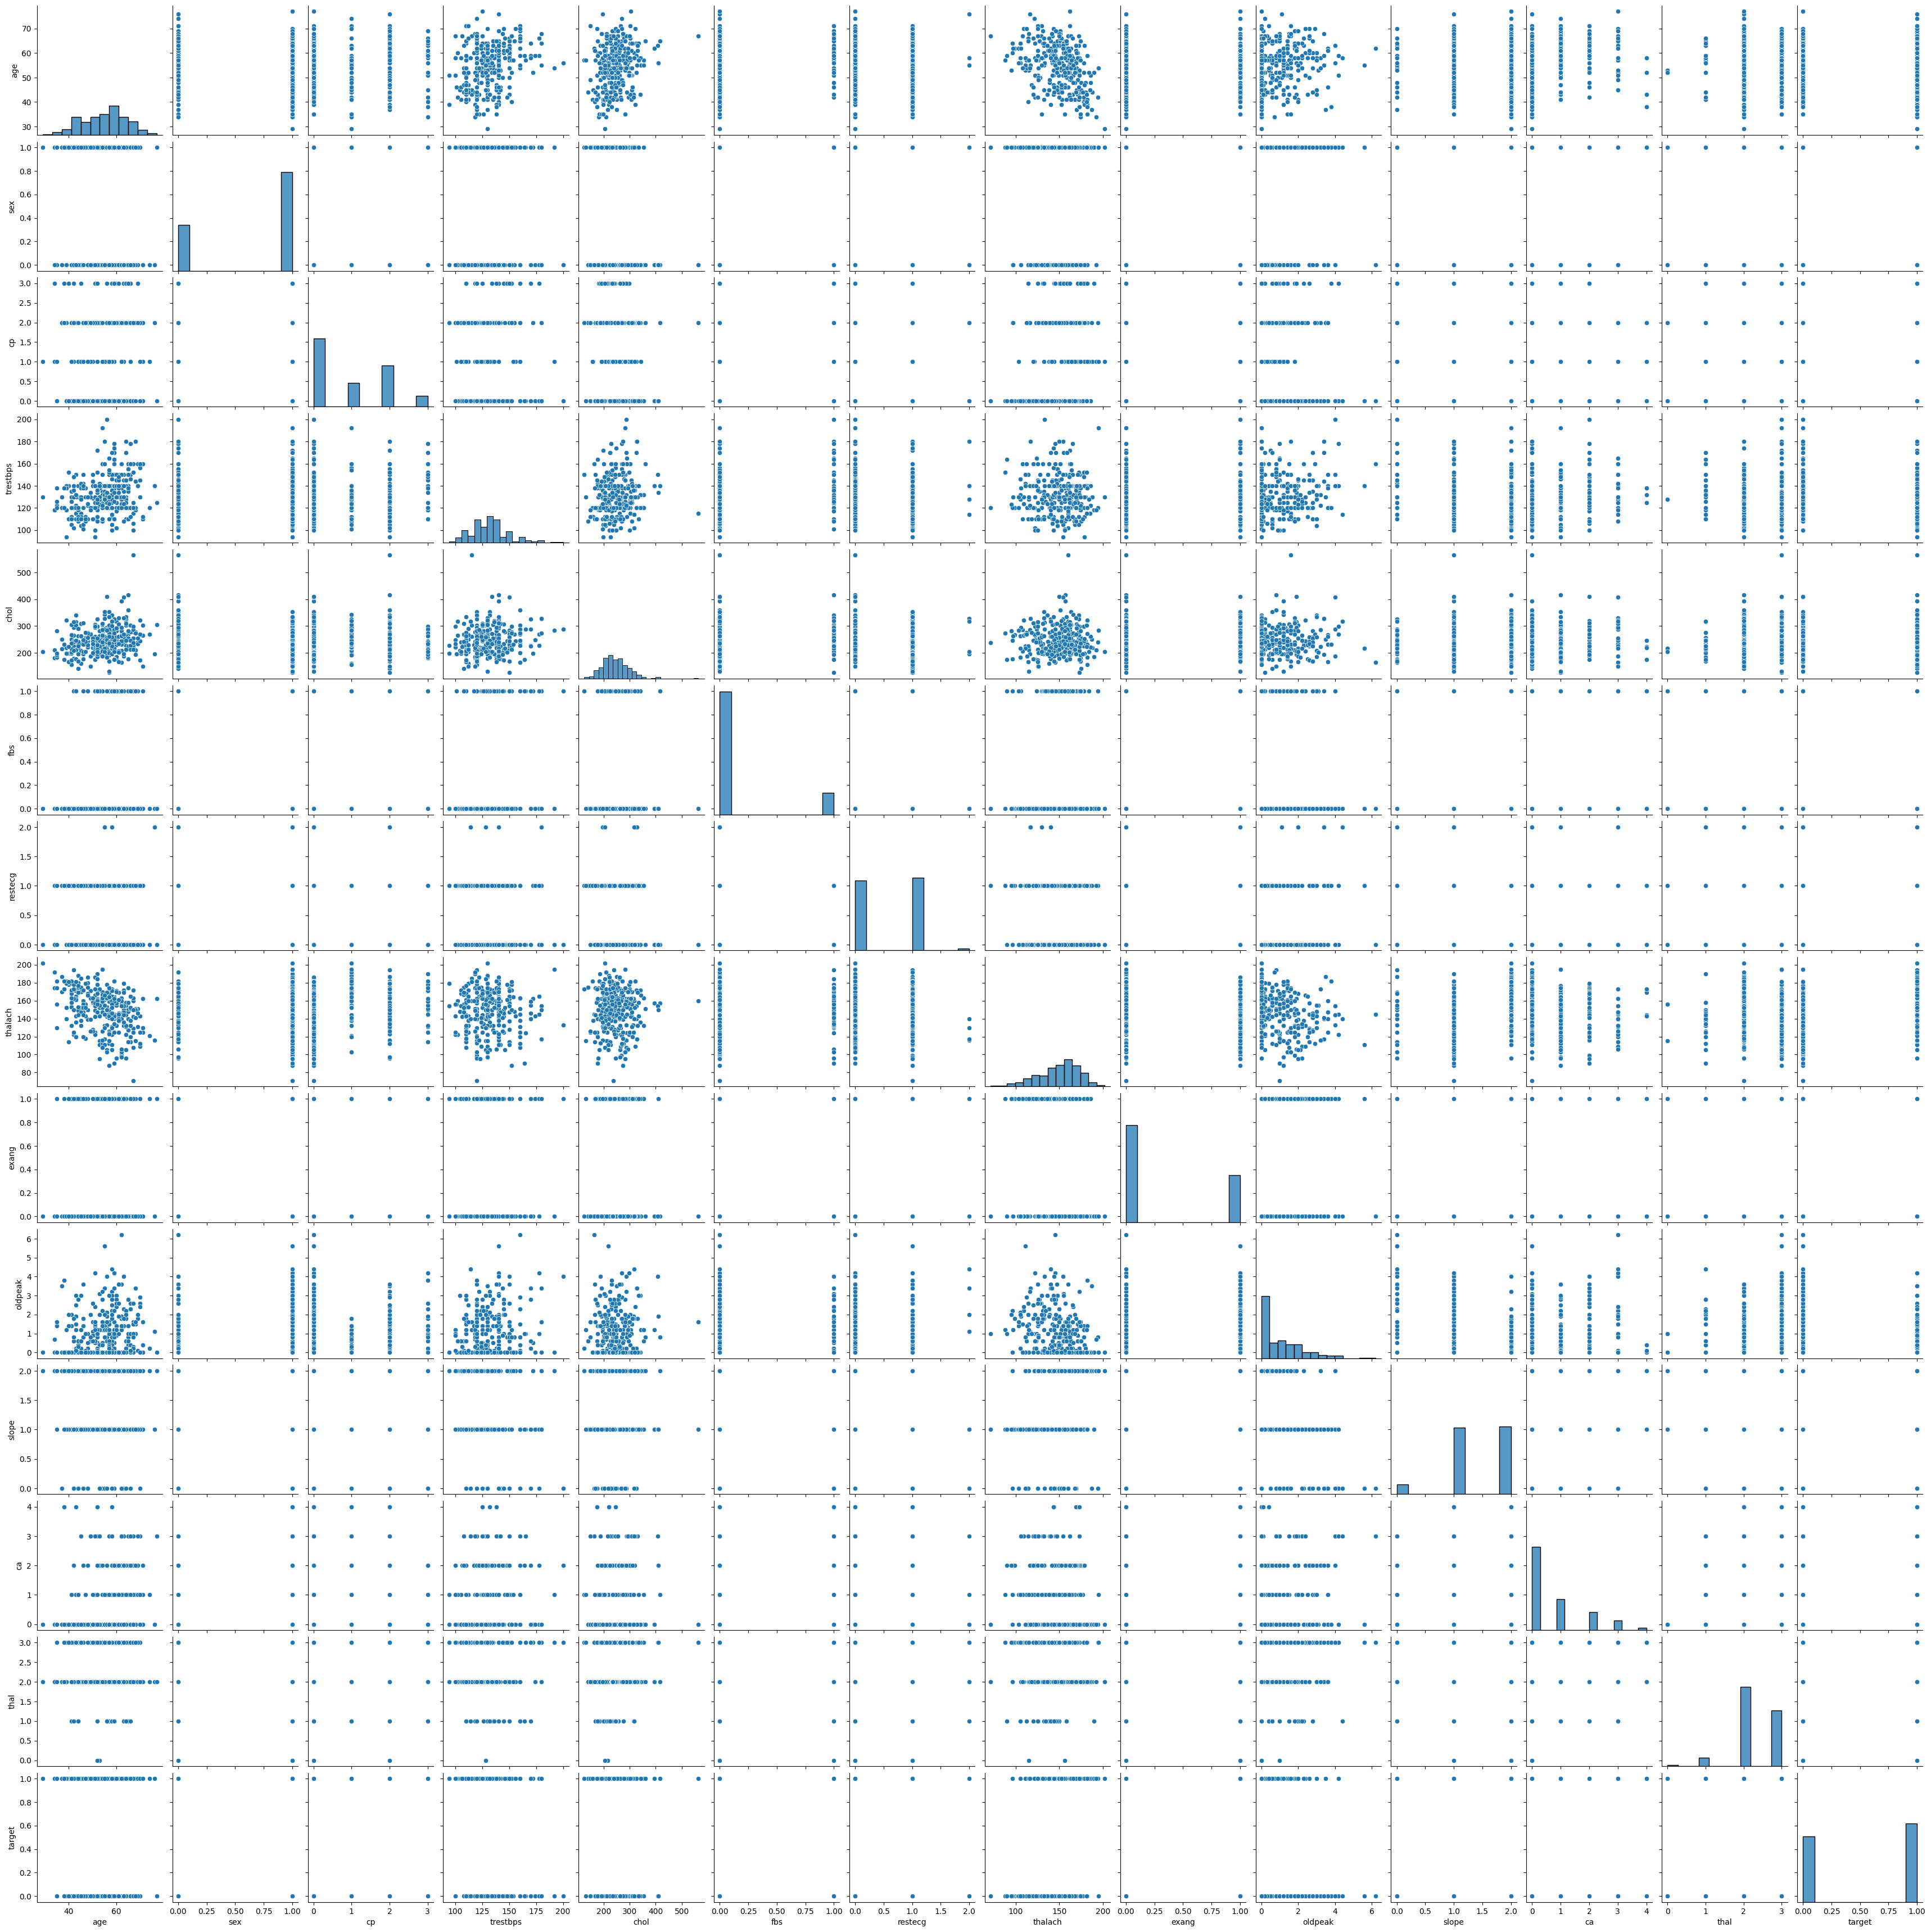

In [7]:
sns.pairplot(data)

<Axes: >

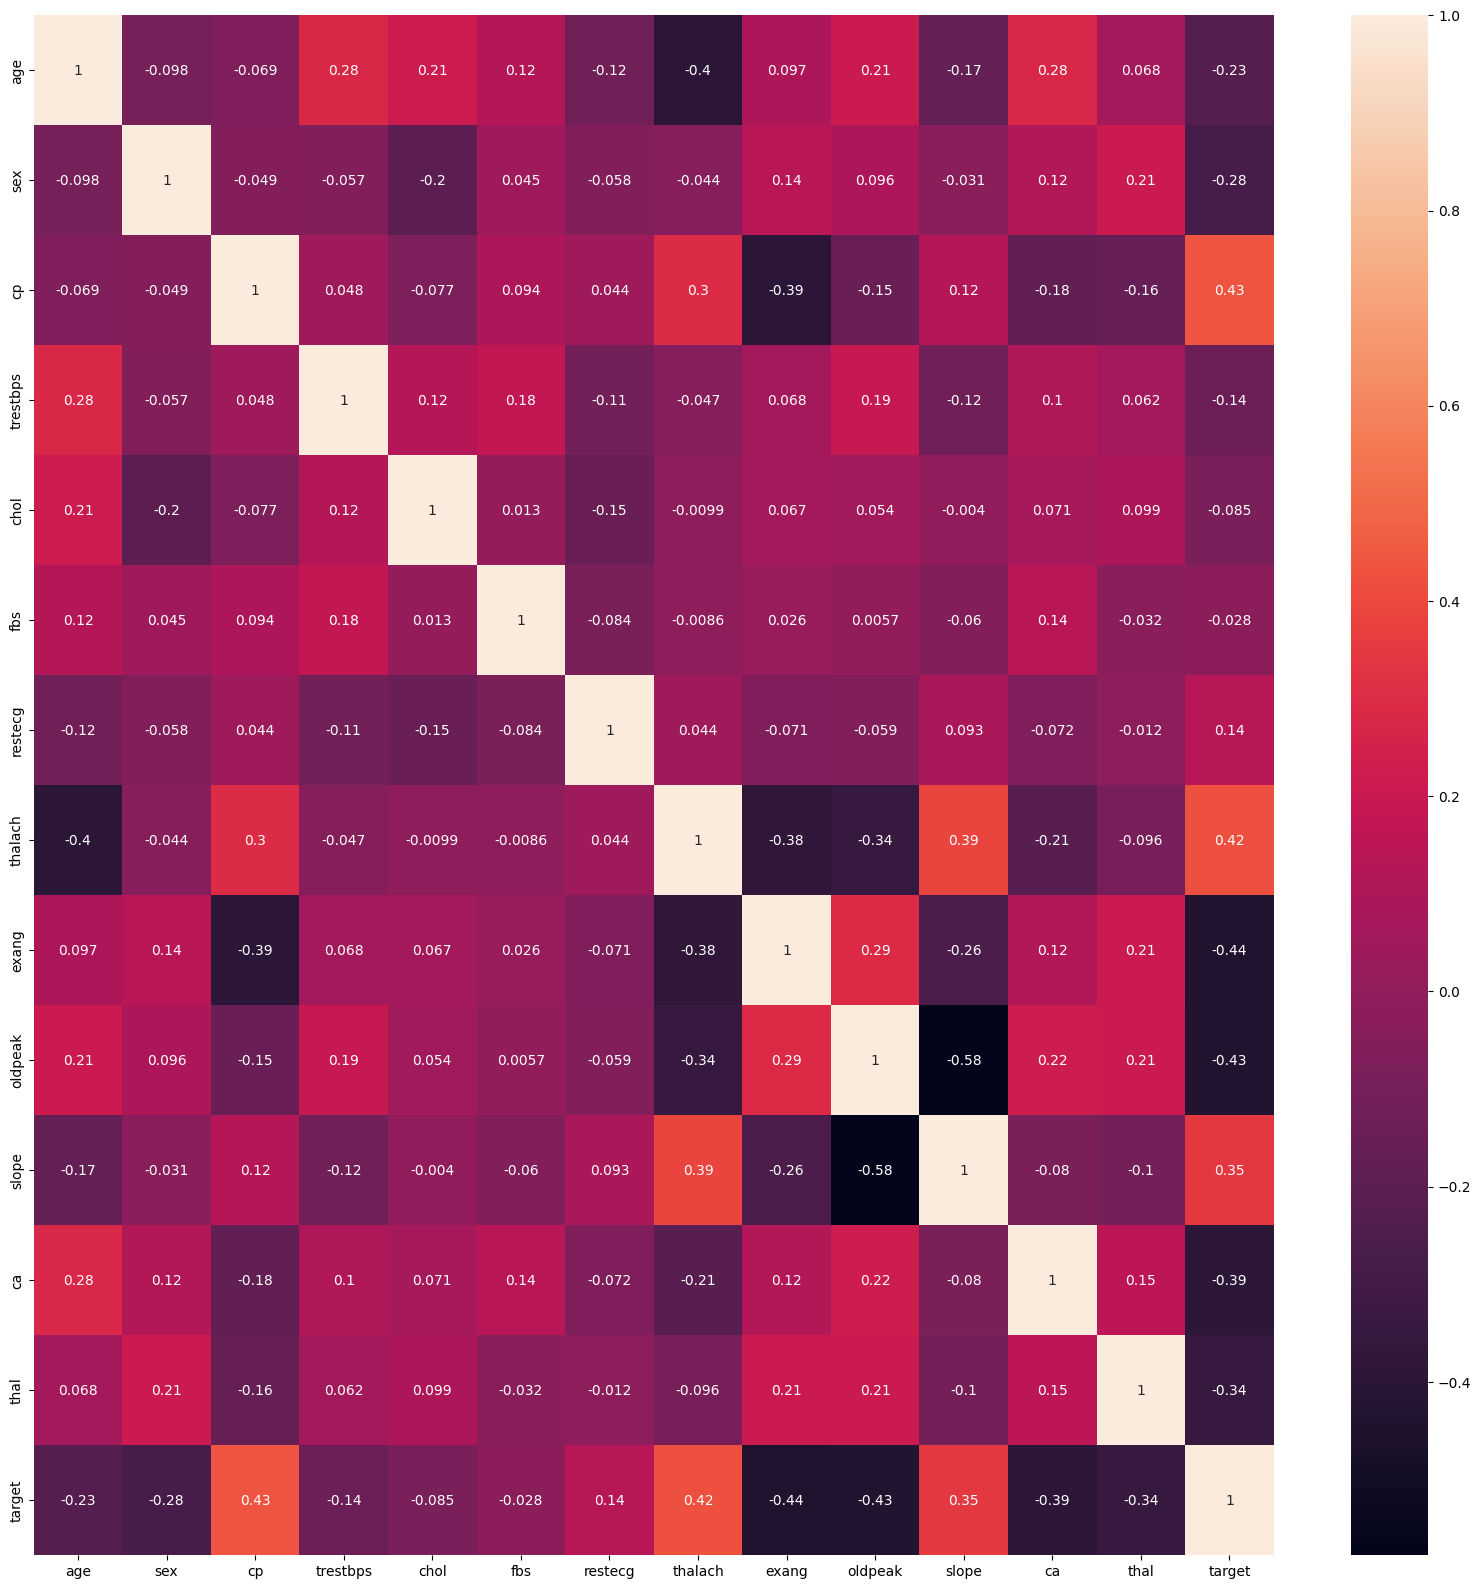

In [8]:
data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

# NAN Value

In [9]:
data.sum().isna()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

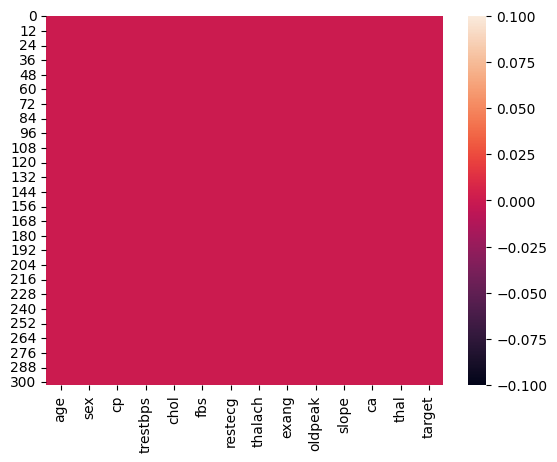

In [10]:
sns.heatmap(data.isna())
plt.show()

# Duplicates

In [11]:
data.duplicated().sum()


1

In [12]:
data.drop_duplicates(inplace=True )

In [13]:
data.shape

(302, 14)

# EDA


In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target', ylabel='count'>

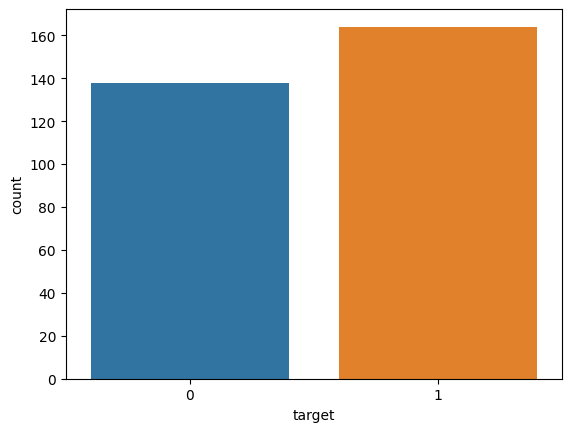

In [15]:
# target ==> that show us the data is almost balance
sns.countplot(data = data , x = "target")

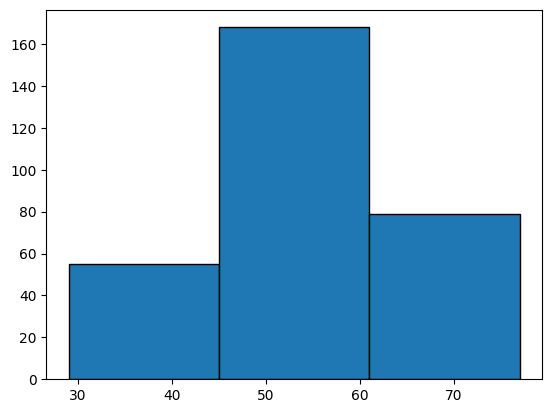

In [16]:
n, bins, patches = plt.hist(data['age'],edgecolor='black' , bins = 3)


In [17]:
bins

array([29., 45., 61., 77.])

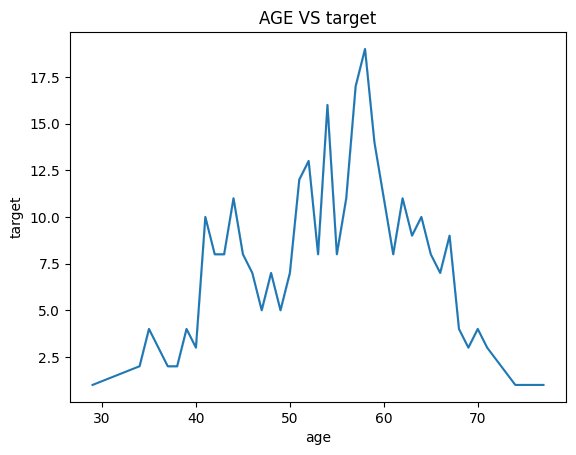

In [18]:
sns.lineplot(data=data,y='target',x='age',estimator=len)
plt.title('AGE VS target')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

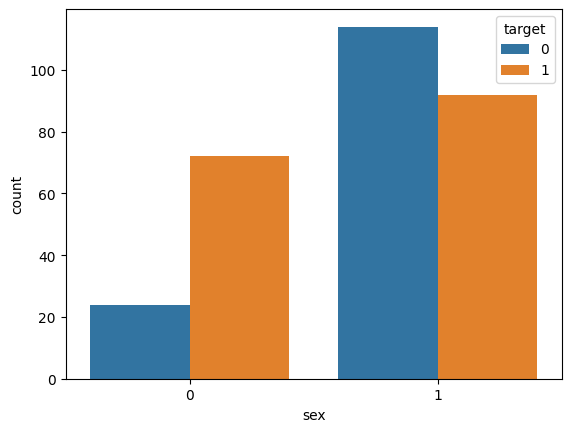

In [19]:
sns.countplot(data=data, x="sex", hue="target")


<Axes: xlabel='cp', ylabel='count'>

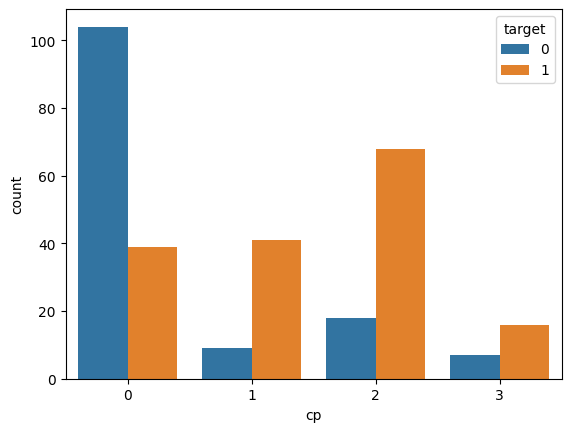

In [20]:
sns.countplot(data=data, x="cp", hue="target")


<Axes: xlabel='thalach', ylabel='Count'>

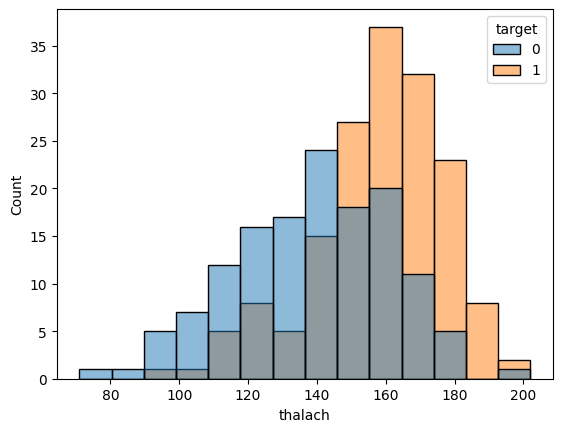

In [21]:
sns.histplot(x=data['thalach'],hue=data['target'])


# Outliers

In [22]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

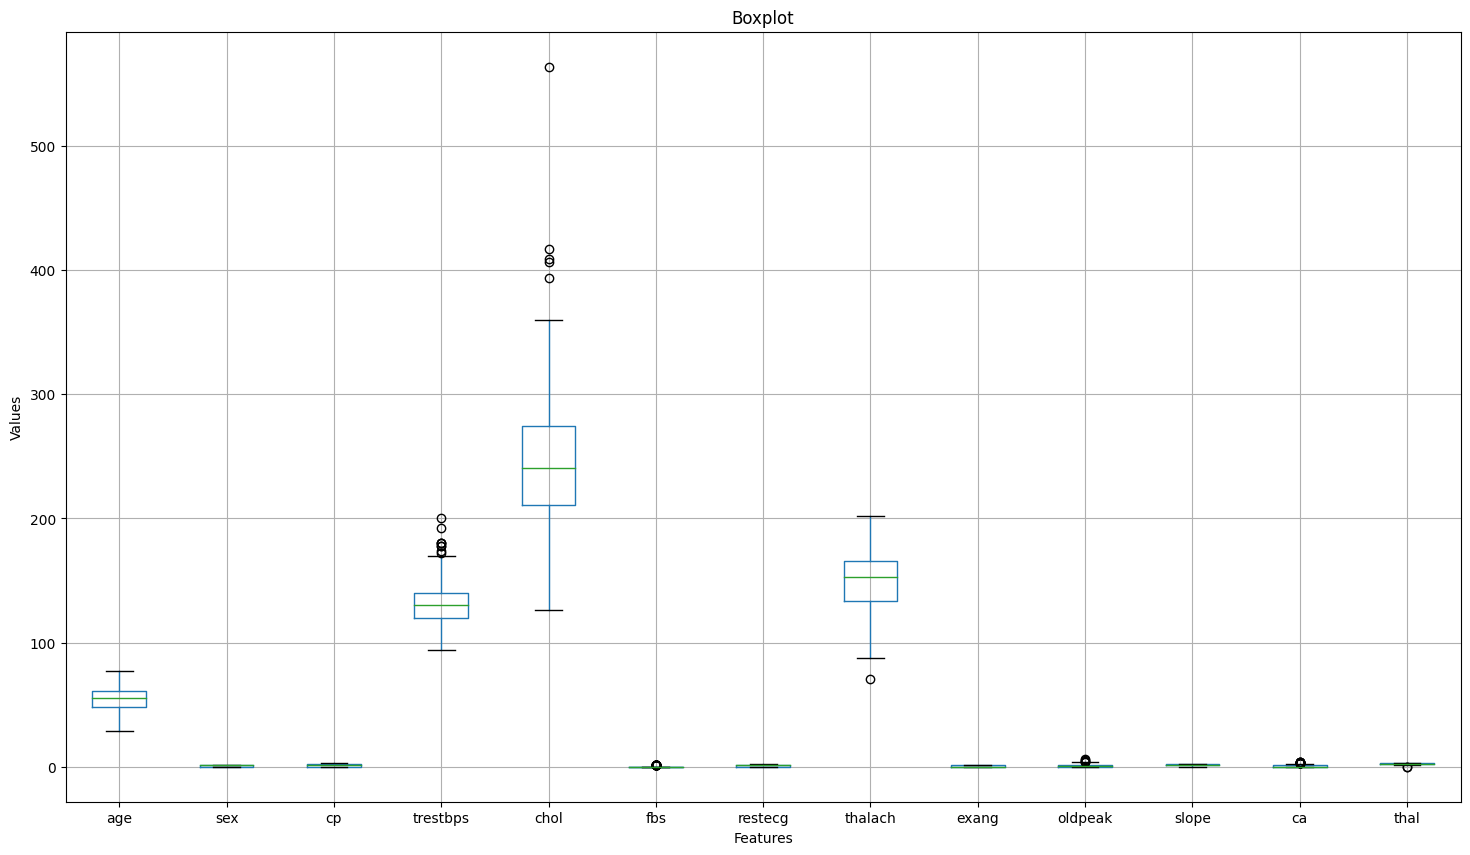

In [23]:
attr =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
plt.figure(figsize=(18, 10))
data[attr].boxplot()


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot')


plt.show()

In [24]:
def outliers(data , features):

  Q1 = data[features].quantile(0.25)
  Q3 = data[features].quantile(0.75)

  IQR = Q3-Q1

  Lower_bound = Q1 - 1.5 * IQR
  Upper_bound = Q3 + 1.5 * IQR

  ls = data.index[(data[features]<Lower_bound ) | (data[features]>Upper_bound) ]

  return ls

In [25]:
indx_list = []
for col in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
       indx_list.extend(outliers(data ,col))

In [26]:
len(indx_list)

91

In [27]:
data.shape

(302, 14)

In [28]:
302-91

211

In [29]:
def remove(data , ls):

  ls  = sorted(set(ls))
  data = data.drop(ls)

  return data

In [30]:
data_cleand = remove(data ,indx_list )

In [31]:
data_cleand.shape

(228, 14)

# Imbalance

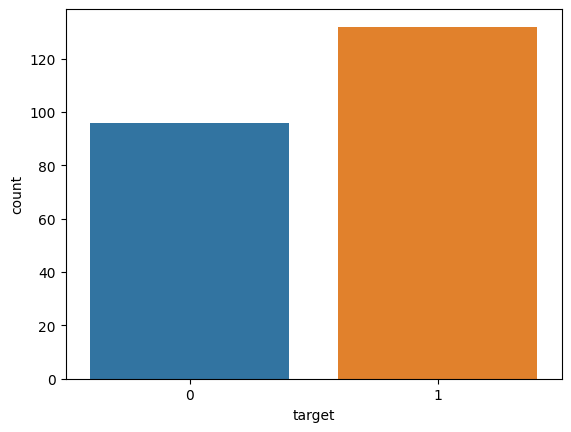

In [32]:
sns.countplot(x=data_cleand["target"])
plt.show()

In [33]:
data_cleand["target"].value_counts()

1    132
0     96
Name: target, dtype: int64

**The data here is balance because the relation is every (1):(1.3)
so we dont apply any balancing method (underfitting , overfitting)**

# Feature Engginering

In [ ]:
data.loc[data["age"].between(29, 44, inclusive = True)  ,'Age' ] ='Adult'
data.loc[data["age"].between(45, 60, inclusive = True)  ,'Age' ] ='Middle Age Adult'
data.loc[data["age"].between(61, 77, inclusive = True)  ,'Age' ] ='Senior Adult'

In [37]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'age'.
data['Age']= label_encoder.fit_transform(data['Age'])

data['Age'].unique()

array([2, 0, 1])

In [38]:
data = data.drop("age" , axis = 1)

In [39]:
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


# Split The Data

In [40]:
X = data_cleand.drop("target", axis=1)
y = data_cleand["target"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y ,random_state=42)

In [42]:
X_train.shape

(152, 13)

In [43]:
X_test.shape

(76, 13)

# Normalization


In [44]:
data_cleand.mean(axis =  0)

age          53.333333
sex           0.675439
cp            0.942982
trestbps    128.671053
chol        242.372807
fbs           0.000000
restecg       0.548246
thalach     151.070175
exang         0.315789
oldpeak       0.946053
slope         1.451754
ca            0.478070
thal          2.315789
target        0.578947
dtype: float64

**As we see here the differences between feature mean are big so we applied normalization techniques**

In [45]:
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)



# Model Buliding & Evaluation

**Evaluation**

In [46]:
def evaluate(model):
    print(f'accuracy on train: {model.score(X_train, y_train)}')
    print(f'accuracy on test: {model.score(X_test, y_test)}')

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'\n\n{cm}')
    print(f'\n\n{classification_report(y_test, y_pred)}')

    scores = cross_val_score(model, X, y, scoring="recall", cv=10)
    print(f'10-Fold cross validation avg score: {scores.mean()}')
    print("---------------------------------------------------------")

**Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming you have your feature data in X and target variable in y

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Define the range of C values to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=10)
grid_search.fit(X, y)

# Get the best C value and corresponding score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

In [66]:
best_C,best_score

(1, 0.8636363636363636)

In [70]:
# ##########################TOP 1#############################
logistic = LogisticRegression(C=0.1, max_iter=1000)
logistic.fit(X_train,y_train)

print("Logistic regression:\n")
evaluate(logistic)

Logistic regression:

accuracy on train: 0.8552631578947368
accuracy on test: 0.9078947368421053


[[27  5]
 [ 2 42]]


              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.89      0.95      0.92        44

    accuracy                           0.91        76
   macro avg       0.91      0.90      0.90        76
weighted avg       0.91      0.91      0.91        76

10-Fold cross validation avg score: 0.9401098901098901
---------------------------------------------------------


**KNN**

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

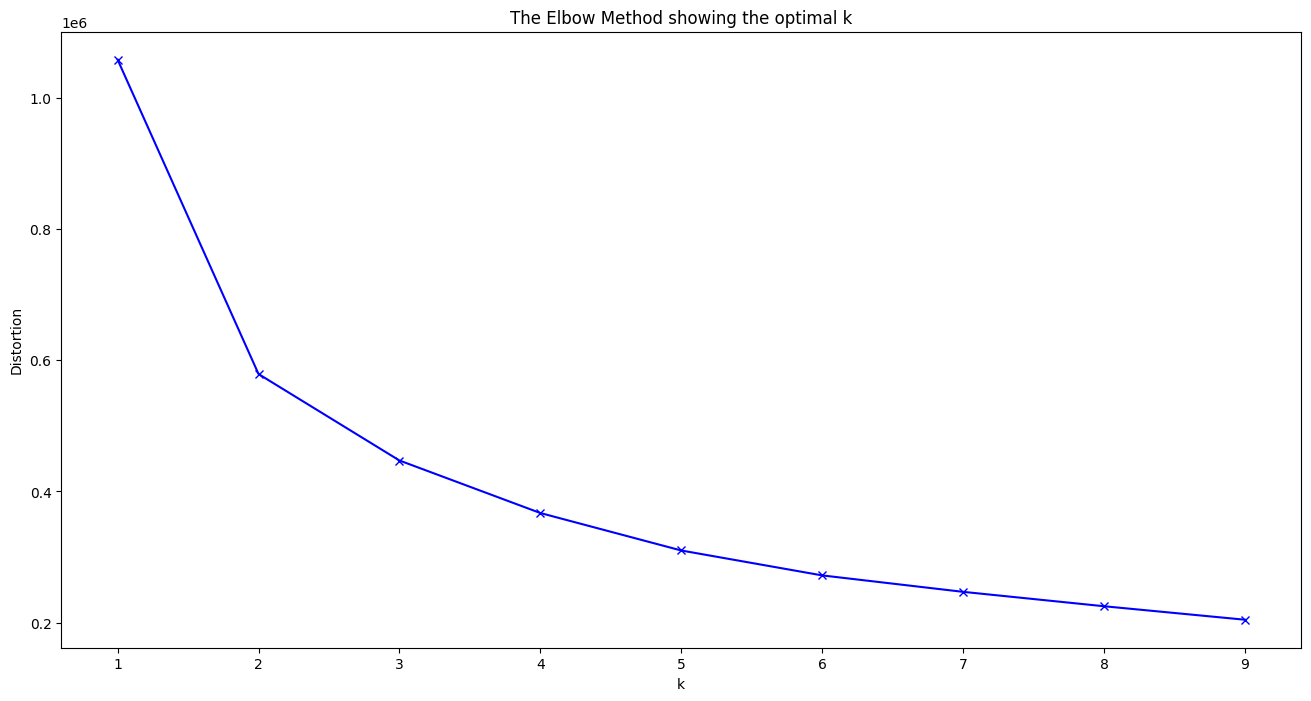

In [51]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [52]:
# the knn not working in this dataset have a bad accuracy

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print("KNN:\n")
evaluate(knn)

KNN:

accuracy on train: 0.7105263157894737
accuracy on test: 0.6447368421052632


[[19 13]
 [14 30]]


              precision    recall  f1-score   support

           0       0.58      0.59      0.58        32
           1       0.70      0.68      0.69        44

    accuracy                           0.64        76
   macro avg       0.64      0.64      0.64        76
weighted avg       0.65      0.64      0.65        76

10-Fold cross validation avg score: 0.6291208791208792
---------------------------------------------------------


**Decision Tree**

In [53]:
# the decisionTree have overfitting
#Decision Tree classifier
dt = DecisionTreeClassifier(random_state=5)
dt.fit(X_train, y_train)
print("Decision Tree:\n")
evaluate(dt)

Decision Tree:

accuracy on train: 1.0
accuracy on test: 0.6973684210526315


[[26  6]
 [17 27]]


              precision    recall  f1-score   support

           0       0.60      0.81      0.69        32
           1       0.82      0.61      0.70        44

    accuracy                           0.70        76
   macro avg       0.71      0.71      0.70        76
weighted avg       0.73      0.70      0.70        76

10-Fold cross validation avg score: 0.8252747252747252
---------------------------------------------------------


**Naive Base**

In [54]:
# ################################TOP3#####################################
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes:\n")
evaluate(nb)

Naive Bayes:

accuracy on train: 0.8355263157894737
accuracy on test: 0.8421052631578947


[[27  5]
 [ 7 37]]


              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.88      0.84      0.86        44

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

10-Fold cross validation avg score: 0.8203296703296703
---------------------------------------------------------


**SVC**

In [55]:
# #########################TOP 2 #########################################
svm = SVC(kernel='linear' , probability=True)
svm.fit(X_train, y_train)

print("SVM:\n")
evaluate(svm)

SVM:

accuracy on train: 0.881578947368421
accuracy on test: 0.8552631578947368


[[27  5]
 [ 6 38]]


              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.88      0.86      0.87        44

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76

10-Fold cross validation avg score: 0.8796703296703295
---------------------------------------------------------


In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)
evaluate(rf)

accuracy on train: 1.0
accuracy on test: 0.8289473684210527


[[28  4]
 [ 9 35]]


              precision    recall  f1-score   support

           0       0.76      0.88      0.81        32
           1       0.90      0.80      0.84        44

    accuracy                           0.83        76
   macro avg       0.83      0.84      0.83        76
weighted avg       0.84      0.83      0.83        76

10-Fold cross validation avg score: 0.8719780219780219
---------------------------------------------------------


**Bagging**

In [57]:
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=5)
bc.fit(X_train, y_train)
print("Bagging:\n")
evaluate(bc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging:

accuracy on train: 1.0
accuracy on test: 0.7631578947368421


[[28  4]
 [14 30]]


              precision    recall  f1-score   support

           0       0.67      0.88      0.76        32
           1       0.88      0.68      0.77        44

    accuracy                           0.76        76
   macro avg       0.77      0.78      0.76        76
weighted avg       0.79      0.76      0.76        76



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

10-Fold cross validation avg score: 0.8258241758241758
---------------------------------------------------------


**Boosting**

In [75]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=70)
ada.fit(X_train, y_train)

print("AdaBoost:\n")
evaluate(ada)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

AdaBoost:

accuracy on train: 1.0
accuracy on test: 0.7368421052631579


[[27  5]
 [15 29]]


              precision    recall  f1-score   support

           0       0.64      0.84      0.73        32
           1       0.85      0.66      0.74        44

    accuracy                           0.74        76
   macro avg       0.75      0.75      0.74        76
weighted avg       0.76      0.74      0.74        76

10-Fold cross validation avg score: 0.8027472527472528
---------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random (chance) Prediction: AUROC = 0.500
Logistic regression : AUROC = 0.947
SVC: AUROC = 0.918


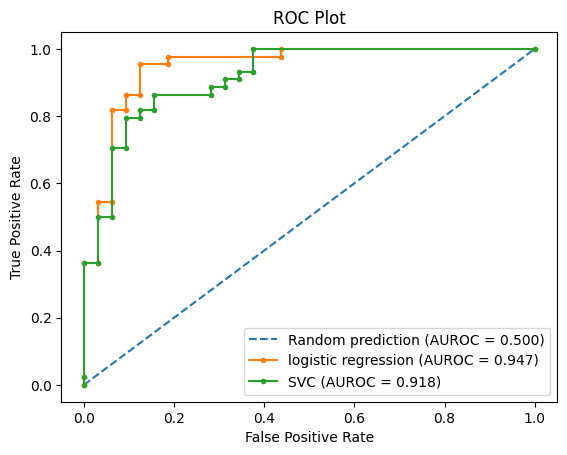

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(y_test))]
logistic_probs = logistic.predict_proba(X_test)
svm_probs = svm.predict_proba(X_test)



logistic_probs = logistic_probs[:, 1]
svm_probs = svm_probs[:, 1]



r_auc = roc_auc_score(y_test, r_probs)
logistic_auc = roc_auc_score(y_test, logistic_probs)
svm_auc = roc_auc_score(y_test, svm_probs)



print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic regression : AUROC = %.3f' % (logistic_auc))
print('SVC: AUROC = %.3f' % (svm_auc))


r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)




plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic regression (AUROC = %0.3f)' % logistic_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVC (AUROC = %0.3f)' % svm_auc)




plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

**ROC-AUC Curve tell us that the logestic regression is the best algorthim**

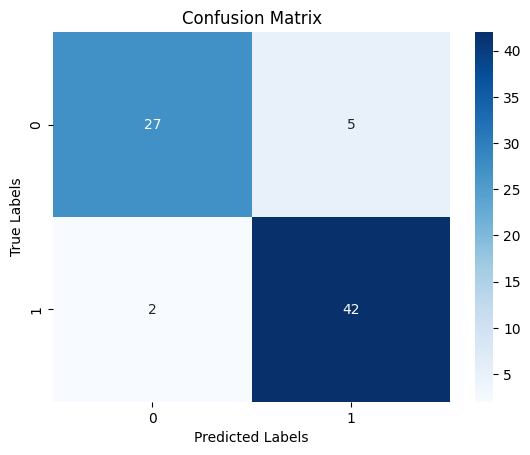

In [60]:
y_pred = logistic.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

labels = np.unique(y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()